In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import scipy.stats as stats
%matplotlib inline


In [71]:
import pandas as pd

df = pd.read_csv("C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/M25_DA_A1_Dataset2.csv")
print(df.info())
print(df.describe())
print(df.head())


C:\Users\bvgpo\AppData\Local\Temp\ipykernel_143196\2513233673.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/M25_DA_A1_Dataset2.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB
None
                 ID  Units Available         Price  Maintenance Charges  \
count  12685.000000      6135.000000  1.260100e+04         6.283000e+03   
mean    6343.000000         7.751589  2.640261e+07         9.076812e+03   
std     3661.988417        26.335448  3.653648e+08         2.399983e+05   
min        1.000000         0.000000  1.000000e+05         0.000000e+00   
25%     3172.000000         0.000000  7.000000e+06         1.000000e+01   
50%     6343.000000         1.000000  1.350000e+07         2.500000e+03   
75%     9514.000000         5.000000  2.550000e+07         6.000000e+03   
max    12685.000000       750.000000  4.080000e+10         1.768000e+07   

       Booking Amount  Covered Area   sqft Price    Carpet Area      Bathroom  \
count    7.701000e+03  11374.000000  1.148000e+04  10133

In [72]:
print(df.columns.tolist())


['ID', 'Possession Status', 'Availability Starts From', 'Floor No', 'Commercial', 'Developer', 'Approved Authority Name', 'Units Available', 'Price', 'Price (English)', 'Flooring Type', 'Electricity Status', 'Maintenance Type', 'Maintenance Charges', 'Booking Amount', 'Landmark', 'Covered Area', 'Project Name', 'sqft Price ', 'Carpet Area', 'Area Name', 'Property Uniqueness', 'Unit of Carpet Area', 'Society', 'Ownership Type', 'furnished Type', 'Bathroom', 'Parking', 'Facing', 'Amenities Facing', 'Transaction Type', 'Floor Data', 'Type of Property', 'City', 'bedroom', 'Data Referred From', 'floors', 'Water Status', 'Luxury Flat', 'Covered Area.1', 'Carpet Area Unit', 'isPrimeLocationProperty', 'Tenants Preference', 'Location', 'Property', 'covArea Unit', 'isLuxuryServiceProvided', 'Property Lifespan', 'balconies', 'Rera', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage', 'Private Terrace/Garde

In [73]:
#column name re-structuring

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [67]:
print(df.columns.tolist())

['id', 'possession_status', 'availability_starts_from', 'floor_no', 'commercial', 'developer', 'approved_authority_name', 'units_available', 'price', 'price_(english)', 'flooring_type', 'electricity_status', 'maintenance_type', 'maintenance_charges', 'booking_amount', 'landmark', 'covered_area', 'project_name', 'sqft_price', 'carpet_area', 'area_name', 'property_uniqueness', 'unit_of_carpet_area', 'society', 'ownership_type', 'furnished_type', 'bathroom', 'parking', 'facing', 'amenities_facing', 'transaction_type', 'floor_data', 'type_of_property', 'city', 'bedroom', 'data_referred_from', 'floors', 'water_status', 'luxury_flat', 'covered_area.1', 'carpet_area_unit', 'isprimelocationproperty', 'tenants_preference', 'location', 'property', 'covarea_unit', 'isluxuryserviceprovided', 'property_lifespan', 'balconies', 'rera', 'power_back_up', 'lift', 'rain_water_harvesting', 'club_house', 'swimming_pool', 'gymnasium', 'park', 'parking.1', 'security', 'water_storage', 'private_terrace/garden

In [74]:
# Removing Redundant columns,rename columns appropriately
df.drop(columns=['price_(english)','covered_area.1','carpet_area_unit','covarea_unit', 'parking.1','land_area_/_covered_area' ,'kids_play_area','floor_no','isluxuryserviceprovided','library'], inplace=True)

df.rename(columns={'unit_of_carpet_area':'unit_of_area'}, inplace=True)

In [76]:
#format price in lakhs

df['price_lakhs'] = df['price'] / 1e5

#drop price column and have price_lakhs instead

df.drop(columns=['price'], inplace=True)



In [77]:
print(df.columns.tolist())

['id', 'possession_status', 'availability_starts_from', 'commercial', 'developer', 'approved_authority_name', 'units_available', 'flooring_type', 'electricity_status', 'maintenance_type', 'maintenance_charges', 'booking_amount', 'landmark', 'covered_area', 'project_name', 'sqft_price', 'carpet_area', 'area_name', 'property_uniqueness', 'unit_of_area', 'society', 'ownership_type', 'furnished_type', 'bathroom', 'parking', 'facing', 'amenities_facing', 'transaction_type', 'floor_data', 'type_of_property', 'city', 'bedroom', 'data_referred_from', 'floors', 'water_status', 'luxury_flat', 'isprimelocationproperty', 'tenants_preference', 'location', 'property', 'property_lifespan', 'balconies', 'rera', 'power_back_up', 'lift', 'rain_water_harvesting', 'club_house', 'swimming_pool', 'gymnasium', 'park', 'security', 'water_storage', 'private_terrace/garden', 'vaastu_compliant', 'service/goods_lift', 'air_conditioned', 'visitor_parking', 'intercom_facility', 'maintenance_staff', 'waste_disposal'

In [78]:
# grouping similar columns together

# Create a new binary column 'kids_amenities'
df['kids_amenities'] = df[['kidsplay_area', 'kids_play_pool_with_water_slides']].any(axis=1).astype(int)
df.drop(columns=['kidsplay_area', 'kids_play_pool_with_water_slides'], inplace=True)


#Merge club house into a sing category of basic vs premium club house and then delete the original columns
def classify_clubhouse(row):
    if row['large_clubhouse']:
        return 'premium'
    elif row['club_house']:
        return 'basic'
    else:
        return 'none'

df['clubhouse_type'] = df.apply(classify_clubhouse, axis=1)

df.drop(columns=['club_house', 'large_clubhouse'], inplace=True)


# Create a new binary column for food and beverage amenities and delete existing columns
df['food_and_beverage'] = df[['coffee_lounge_&_restaurants', 'bar/lounge', 'cafeteria/food_court']].any(axis=1).astype(int)
df.drop(columns=['coffee_lounge_&_restaurants', 'bar/lounge', 'cafeteria/food_court'], inplace=True)


# Create a new binary column for water-related amenities
df['water_facilities'] = df[['water_status', 'water_storage', 'rain_water_harvesting']].any(axis=1).astype(int)
df.drop(columns=['water_status', 'water_storage', 'rain_water_harvesting'], inplace=True)


In [79]:
print(df.columns.tolist())

['id', 'possession_status', 'availability_starts_from', 'commercial', 'developer', 'approved_authority_name', 'units_available', 'flooring_type', 'electricity_status', 'maintenance_type', 'maintenance_charges', 'booking_amount', 'landmark', 'covered_area', 'project_name', 'sqft_price', 'carpet_area', 'area_name', 'property_uniqueness', 'unit_of_area', 'society', 'ownership_type', 'furnished_type', 'bathroom', 'parking', 'facing', 'amenities_facing', 'transaction_type', 'floor_data', 'type_of_property', 'city', 'bedroom', 'data_referred_from', 'floors', 'luxury_flat', 'isprimelocationproperty', 'tenants_preference', 'location', 'property', 'property_lifespan', 'balconies', 'rera', 'power_back_up', 'lift', 'swimming_pool', 'gymnasium', 'park', 'security', 'private_terrace/garden', 'vaastu_compliant', 'service/goods_lift', 'air_conditioned', 'visitor_parking', 'intercom_facility', 'maintenance_staff', 'waste_disposal', 'laundry_service', 'internet/wi-fi_connectivity', 'dth_television_faci

In [80]:
#handling missing values
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])



possession_status              78
availability_starts_from     9602
developer                    5679
approved_authority_name      6542
units_available              6550
flooring_type                4534
electricity_status           5425
maintenance_type             5613
maintenance_charges          6402
booking_amount               4984
landmark                     4644
covered_area                 1311
project_name                 4531
sqft_price                   1205
carpet_area                  2552
property_uniqueness          8025
unit_of_area                 1307
ownership_type               3260
furnished_type                 77
bathroom                       69
parking                      6159
facing                       3569
amenities_facing             4099
floor_data                    858
floors                        866
location                      323
property                      323
property_lifespan            4812
balconies                    6923
rera          

In [81]:
#counting how many binary flags are present per listing
amenity_cols = [
    'power_back_up', 'lift', 'swimming_pool', 'gymnasium', 'park', 'security',
    'private_terrace/garden', 'vaastu_compliant', 'service/goods_lift', 'air_conditioned',
    'visitor_parking', 'intercom_facility', 'maintenance_staff', 'waste_disposal',
    'laundry_service', 'internet/wi-fi_connectivity', 'dth_television_facility',
    'ro_water_system', 'banquet_hall', 'conference_room', 'piped_gas',
    'jogging_and_strolling_track', 'outdoor_tennis_courts', 'infinity_swimming_pool',
    'pool_with_temperature_control', 'smart_home', 'kids_amenities', 'clubhouse_type',
    'food_and_beverage', 'water_facilities'
]

df['amenity_count'] = df[amenity_cols].sum(axis=1)

C:\Users\bvgpo\AppData\Local\Temp\ipykernel_143196\1213084266.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['amenity_count'] = df[amenity_cols].sum(axis=1)


In [82]:
#flag listing with luxury indicators

luxury_features = [
    'luxury_flat', 'private_pool', 'private_jaccuzi', 'mini_cinema_theatre',
    'golf_course', 'skydeck', 'helipad', 'wine_cellar', 'sky_villa', 'fireplace',
    'grand_entrance_lobby', 'private_garage', 'full_glass_wall', 'fingerprint_access'
]

df['is_luxury'] = df[luxury_features].any(axis=1).astype(int)


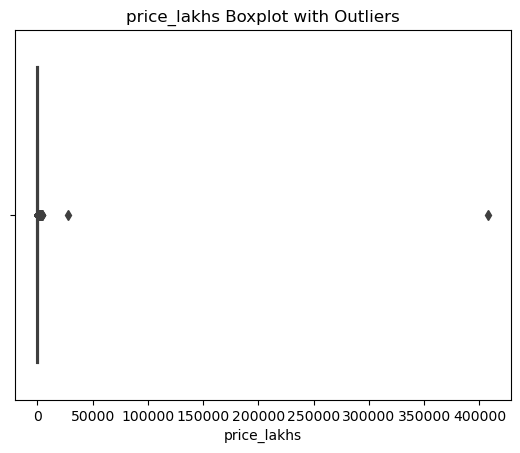

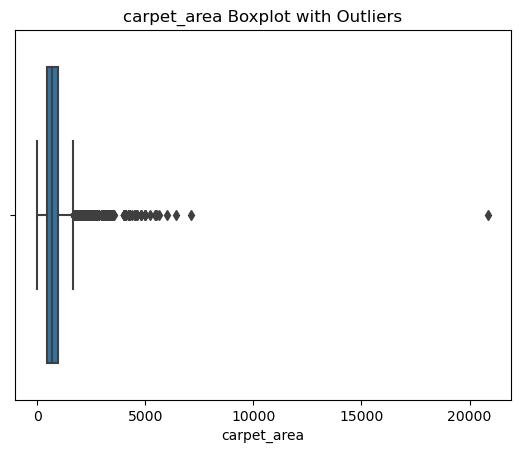

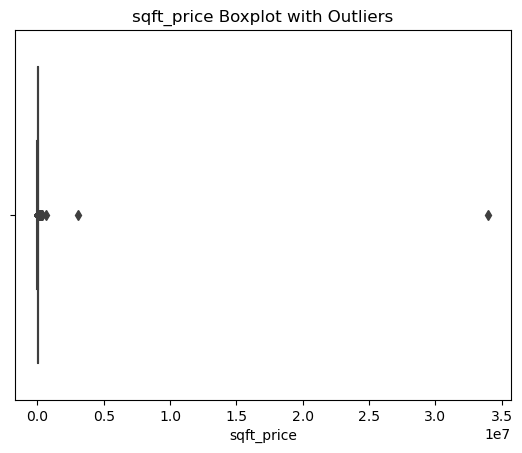

Outlier listings:
Empty DataFrame
Columns: [id, price_lakhs, carpet_area, sqft_price]
Index: []
Outlier counts per feature:
price_lakhs_outlier    0
carpet_area_outlier    0
sqft_price_outlier     0
dtype: int64
Outlier listings:
Empty DataFrame
Columns: [id, price_lakhs, carpet_area, sqft_price]
Index: []


In [90]:
#detecting outliers


num_cols = ['price_lakhs', 'carpet_area', 'sqft_price']


from scipy.stats import zscore

# Compute z-scores
df_z = df[num_cols].apply(zscore)

# Flag outliers (absolute z-score > 3)
outlier_flags = (df_z.abs() > 3)

# Add outlier columns to original DataFrame
for col in num_cols:
    df[f'{col}_outlier'] = outlier_flags[col].astype(int)
    

#visualise others
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot with Outliers')
    plt.show()
    

#finding outlier rows
outlier_rows = df[(df['price_lakhs_outlier'] == 1) | 
                  (df['carpet_area_outlier'] == 1) | 
                  (df['sqft_price_outlier'] == 1)]

print("Outlier listings:")
print(outlier_rows[['id', 'price_lakhs', 'carpet_area', 'sqft_price']].head())



#summarize the outliers
outlier_summary = df[[f'{col}_outlier' for col in num_cols]].sum()
print("Outlier counts per feature:")
print(outlier_summary)


#highlight outlier rows
outlier_rows = df[(df['price_lakhs_outlier'] == 1) | 
                  (df['carpet_area_outlier'] == 1) | 
                  (df['sqft_price_outlier'] == 1)]

print("Outlier listings:")
print(outlier_rows[['id', 'price_lakhs', 'carpet_area', 'sqft_price']].head())

In [91]:
#schema summary
schema_summary = {col: df[col].dtype for col in df.columns}

In [92]:
df.to_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv', index=False)


In [93]:
#Exploratory Data Analysis Begins

# Structure and summary
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 134 entries, id to sqft_price_outlier
dtypes: float64(11), int32(7), int64(81), object(35)
memory usage: 12.6+ MB


Index(['id', 'possession_status', 'availability_starts_from', 'commercial',
       'developer', 'approved_authority_name', 'units_available',
       'flooring_type', 'electricity_status', 'maintenance_type',
       ...
       'price_lakhs', 'kids_amenities', 'clubhouse_type', 'food_and_beverage',
       'water_facilities', 'amenity_count', 'is_luxury', 'price_lakhs_outlier',
       'carpet_area_outlier', 'sqft_price_outlier'],
      dtype='object', length=134)

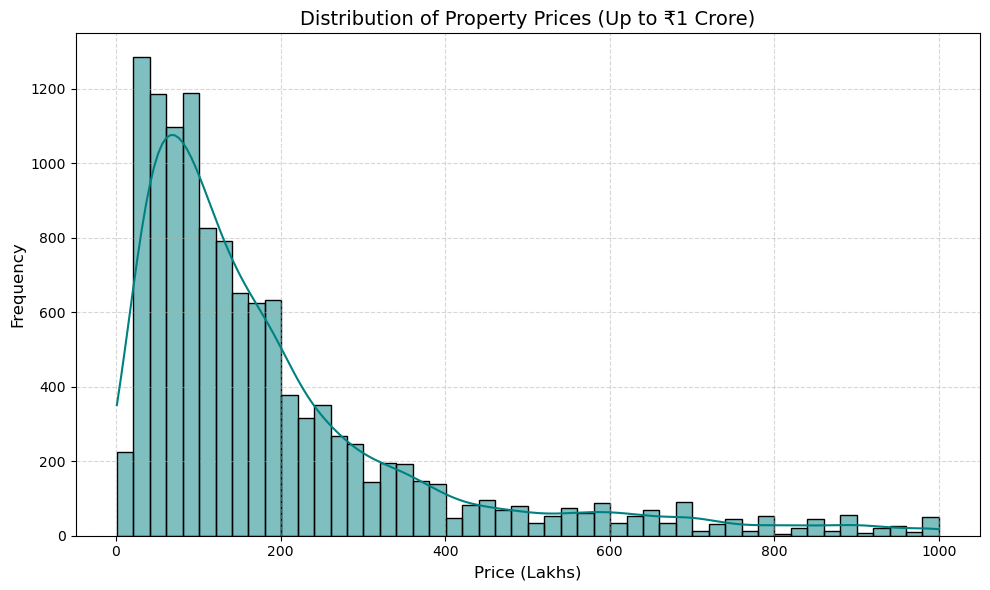

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter listings with price ≤ 1000 lakhs
filtered_df = df[df['price_lakhs'] <= 1000]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['price_lakhs'], bins=50, kde=True, color='teal')
plt.title('Distribution of Property Prices (Up to ₹1 Crore)', fontsize=14)
plt.xlabel('Price (Lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

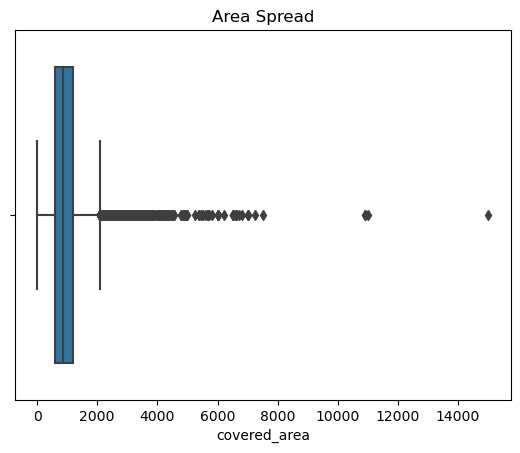

In [100]:
# Boxplot for area
sns.boxplot(x=df['covered_area'])
plt.title('Area Spread')
plt.show()


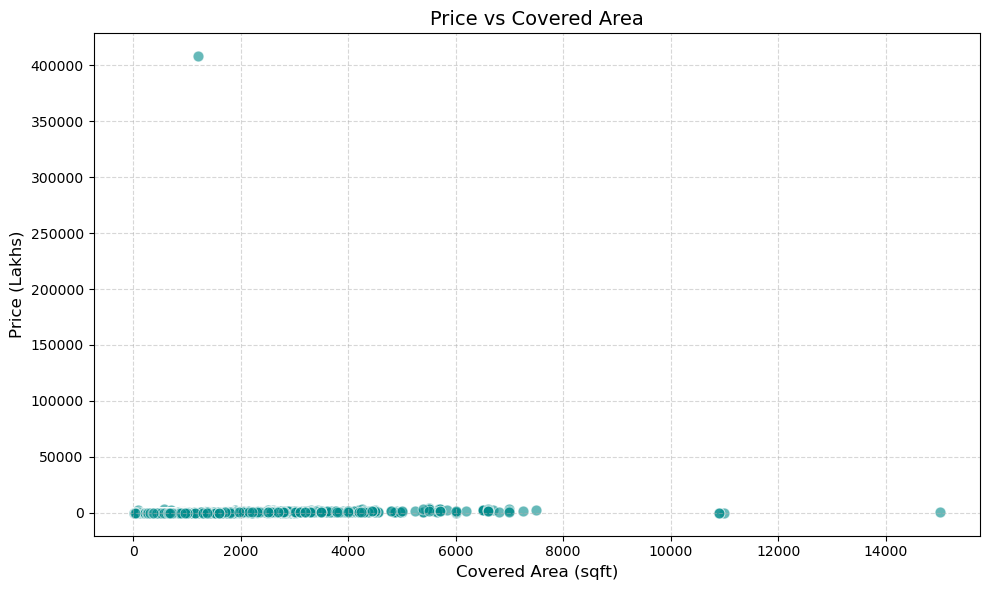

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='covered_area', y='price_lakhs', data=df, color='darkcyan', alpha=0.6, edgecolor='w', s=60)

plt.title('Price vs Covered Area', fontsize=14)
plt.xlabel('Covered Area (sqft)', fontsize=12)
plt.ylabel('Price (Lakhs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
# Average price by location
df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)


location
Shivaji Park, Mumbai          1.341647e+09
Churchgate station, Mumbai    1.400000e+08
Marine Drive, Mumbai          1.199808e+08
Prabhadevi, Mumbai            1.045187e+08
Sundervan Complex, Mumbai     9.500000e+07
RTO Colony, Mumbai            9.385000e+07
Khar Danda, Mumbai            8.658333e+07
North Ave, Mumbai             8.375000e+07
Churchgate, Mumbai            8.266667e+07
Gulmohar Road, Mumbai         8.104800e+07
Name: price, dtype: float64

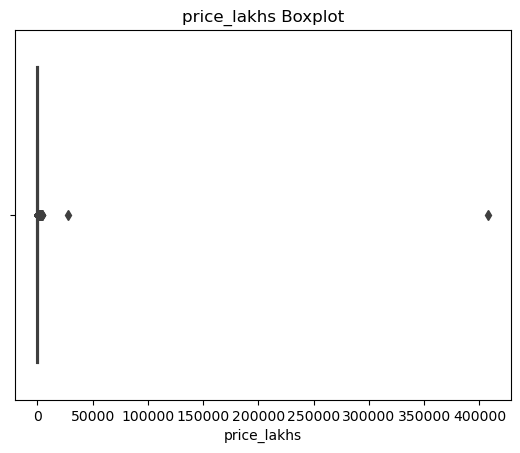

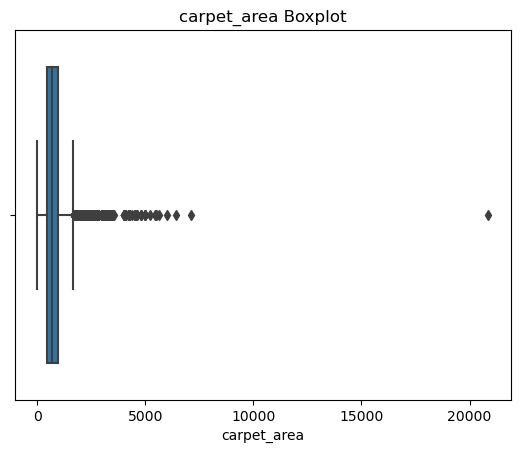

In [102]:
for col in ['price_lakhs', 'carpet_area']:
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


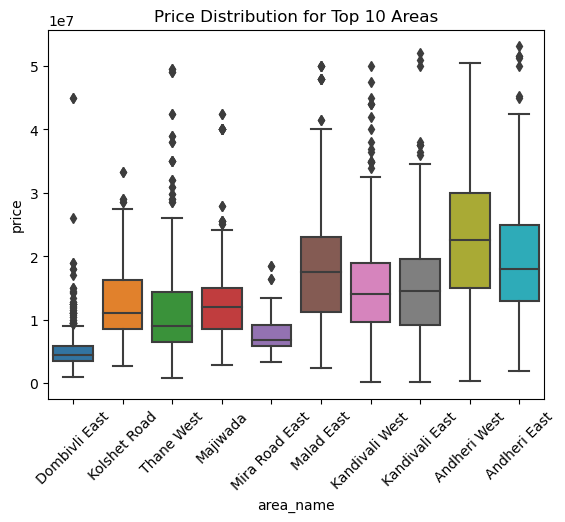

In [141]:
#price distribution of top 10 areas

top_areas = df['area_name'].value_counts().nlargest(10).index
filtered_df = df[df['area_name'].isin(top_areas)]

sns.boxplot(x='area_name', y='price', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 10 Areas')
plt.show()


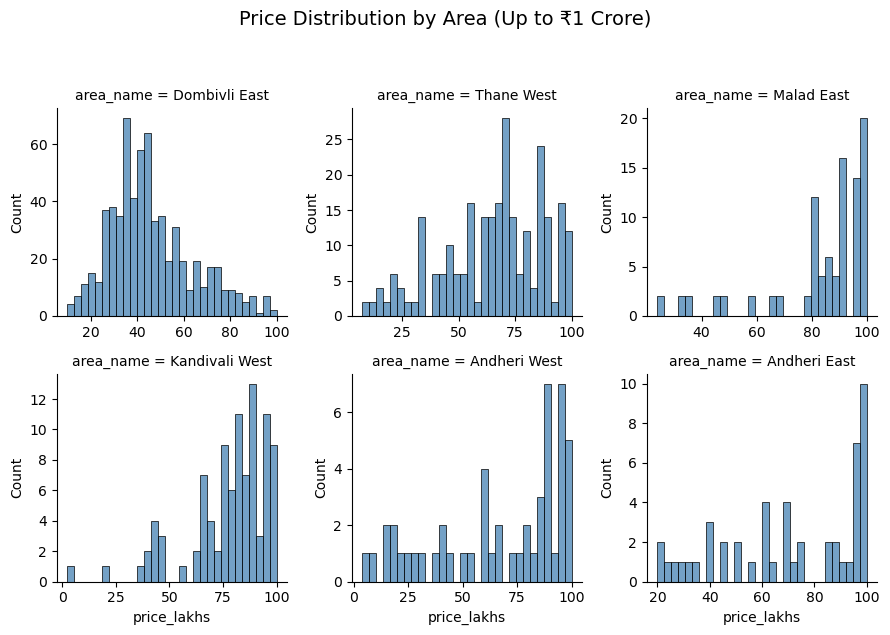

In [104]:
#faceted price distribution area wise
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top N areas to avoid clutter
top_areas = df['area_name'].value_counts().nlargest(6).index
filtered_df = df[df['area_name'].isin(top_areas) & (df['price_lakhs'] <= 100)]

# Create FacetGrid
g = sns.FacetGrid(filtered_df, col='area_name', col_wrap=3, height=3, sharex=False, sharey=False)
g.map(sns.histplot, 'price_lakhs', bins=30, color='steelblue')

# Add title
g.fig.suptitle('Price Distribution by Area (Up to ₹1 Crore)', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

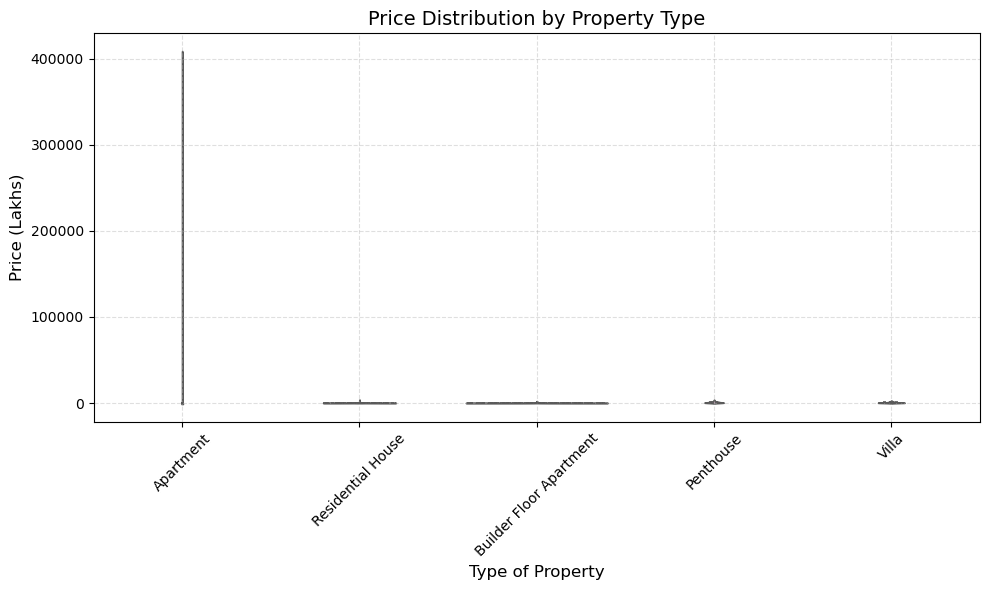

In [105]:
#price by property type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='type_of_property', y='price_lakhs', data=df, palette='Set2', inner='quart', linewidth=1.2)

plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type', fontsize=14)
plt.xlabel('Type of Property', fontsize=12)
plt.ylabel('Price (Lakhs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

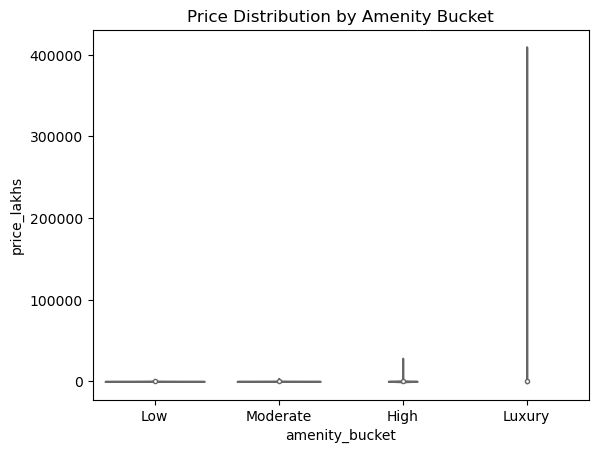

In [106]:
#price distributions across amenity buckets
df['amenity_bucket'] = pd.cut(df['amenity_count'], bins=[0, 5, 10, 20, 40], labels=['Low', 'Moderate', 'High', 'Luxury'])

sns.violinplot(x='amenity_bucket', y='price_lakhs', data=df, palette='coolwarm')
plt.title('Price Distribution by Amenity Bucket')
plt.show()

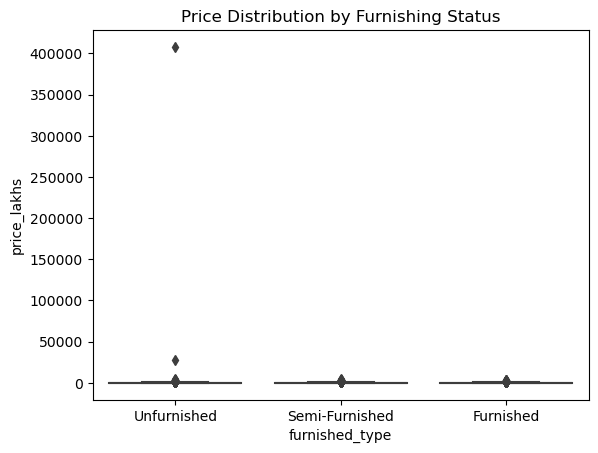

In [107]:
#price distribution by furnishing status
sns.boxplot(x='furnished_type', y='price_lakhs', data=df)
plt.title('Price Distribution by Furnishing Status')
plt.show()


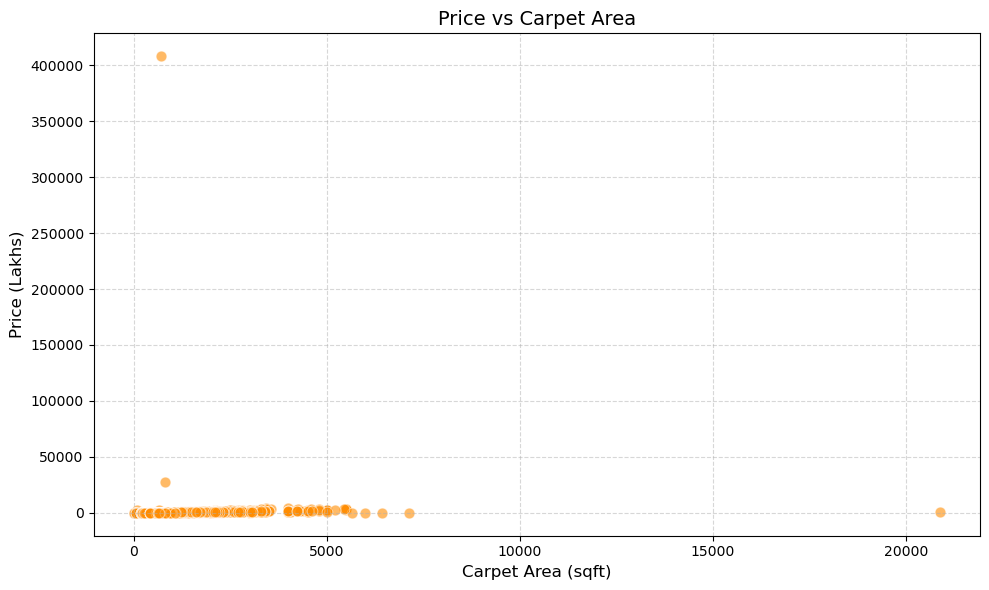

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='carpet_area', y='price_lakhs', data=df, color='darkorange', alpha=0.6, edgecolor='w', s=60)

plt.title('Price vs Carpet Area', fontsize=14)
plt.xlabel('Carpet Area (sqft)', fontsize=12)
plt.ylabel('Price (Lakhs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


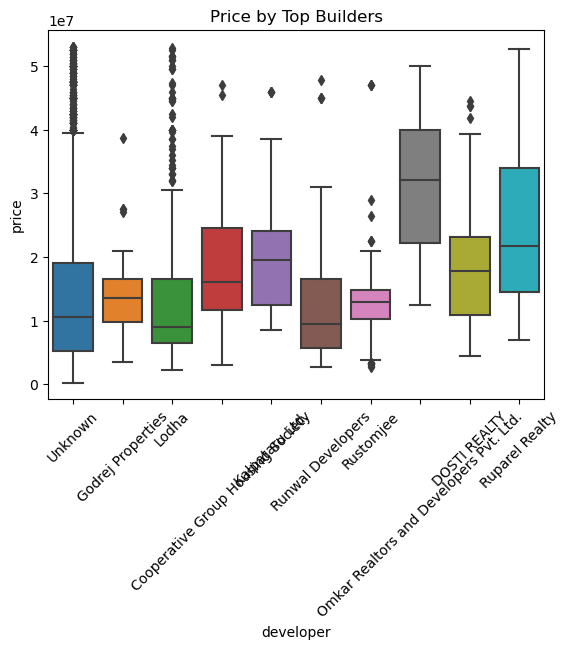

In [155]:
#Developer/builder aspects

top_builders = df['developer'].value_counts().nlargest(10).index
filtered_df = df[df['developer'].isin(top_builders)]

sns.boxplot(x='developer', y='price', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Price by Top Builders')
plt.show()
